<a href="https://colab.research.google.com/github/TyRoBr/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/Fed_BioMed_practical_session_brain_segmentation_ai4health_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment setup

First we install some additional packages that are required by the tutorial but not included in Fed-BioMed

In [1]:
%pip install -q tqdm colab-xterm "jedi>=0.16"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.8 MB/s eta 0:00:00


## Install Fed-BioMed
Fed-BioMed can be installed via pip
```shell
pip install fedbiomed
```

However, for the purposes of this tutorial, we have created a specific python wheel that better supports integration with Google Colab. First, download the wheel file.

In [2]:
!wget 'https://docs.google.com/uc?export=download&id=1R8P5GcAsNQZDPy2ucmixkzd4huFpKvCR' -O fedbiomed-6.1.0-py3-none-any.whl

--2025-07-03 12:06:15--  https://docs.google.com/uc?export=download&id=1R8P5GcAsNQZDPy2ucmixkzd4huFpKvCR
Resolving docs.google.com (docs.google.com)... 192.178.155.100, 192.178.155.113, 192.178.155.102, ...
Connecting to docs.google.com (docs.google.com)|192.178.155.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1R8P5GcAsNQZDPy2ucmixkzd4huFpKvCR&export=download [following]
--2025-07-03 12:06:15--  https://drive.usercontent.google.com/download?id=1R8P5GcAsNQZDPy2ucmixkzd4huFpKvCR&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.115.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5880951 (5.6M) [application/octet-stream]
Saving to: ‘fedbiomed-6.1.0-py3-none-any.whl’

fedbiomed-6.1.0-py3 100%[===================>

Install the wheel file. This will take some time.

There might be some errors at the end, which can be safely ignored.

If prompted, restart the session.


In [ ]:
%pip install ./fedbiomed-6.1.0-py3-none-any.whl

Processing ./fedbiomed-6.1.0-py3-none-any.whl
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of grpcio-tools to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.4/503.4 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━

# Fed-BioMed tutorial

In this tutorial you will interpret both the role of a clinical data provider and a clinical data scientist.

First, let's start by defining the type of problem we wish to solve, the available data, and the deep learning approach that we will use.

## Brain segmentation

In this tutorial we will showcase a brain segmentation task, where we want to predict which pixels of the image belong to the brain, and pixels belong to the _"background"_. The background includes anything that is not the brain (i.e. it also includes the skull).

This task is a common preprocessing step in many imaging studies on the brain.

Here is an example of what we want to achieve: on the left is the input image, while on the right we show a green overlay on every pixel that was classified as _"brain"_.

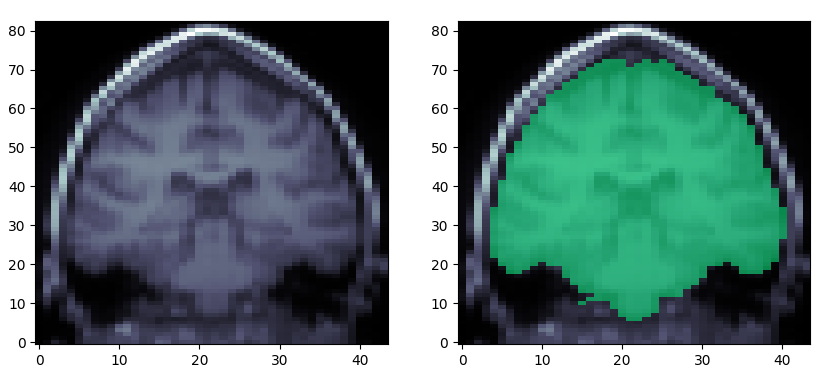

## Available data

This tutorial will use the publicly available [IXI dataset](https://brain-development.org/ixi-dataset/).

This dataset contains 3D MRI brain images from three separate centers:

- Guy's hospital (Guys)
- Hammersmith hospital (HH)
- Institute of Psychiatry (IOP)

Each MRI image has been annotated by experts with a pixel-wise mask, indicating which pixels belong to the _"brain"_ and which pixels should be considered as _"background"_.

### Download the data

Execute the cell below

In [ ]:
%%shell
mkdir -p /content/fedbiomed_components/notebooks/data
cd /content/fedbiomed_components
wget https://raw.githubusercontent.com/fedbiomed/fedbiomed/refs/heads/develop/notebooks/medical-image-segmentation/download_and_split_ixi.py
python download_and_split_ixi.py -f /content/fedbiomed_components

## Deep learning model

The tutorial uses a 3D [U-Net](https://link.springer.com/chapter/10.1007/978-3-319-24574-4_28) model for the segmentation. The implementation relies on the [MONAI](https://docs.monai.io/en/stable/networks.html#unet) library.




# Single-center training at Hammersmith hospital

As a clinical data scientist working at the HH center, you are going to train a UNet segmentation model on the data available at your center.

In [ ]:
import torch
from torch.optim import AdamW, SGD
from torch.utils.data import DataLoader
from monai.networks.nets import UNet
import torch.nn.functional as F
from monai.losses.dice import DiceLoss
from monai.transforms import (Compose, NormalizeIntensity, EnsureChannelFirst, Resize, AsDiscrete)
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
_ = torch.manual_seed(424242)

### Define the data class

We will use Fed-BioMed’s built-in class for image segmentation tasks: [`MedicalFolderDataset`](https://fedbiomed.org/latest/developer/api/common/data/#fedbiomed.common.data.MedicalFolderDataset). This class supports several medical imaging modalities (think all the different types of MRI, CT, PET, etc..). It is optimized for segmentation tasks but can be applied to other tasks (e.g. classification, regression, …). This class supports loading a set of patient demographics data in csv format, in addition to the imaging data.

The inputs to the `__init__` function are:

- root: the filesystem path where the root of the dataset is located
- data_modalities: the names of the modalities of interest for the input data
- target_modalities: the names of the modalities of interest for the data to be predicted
- transform: optional transformations to be performed on the input images
- target_transform: optional transformations to be performed on the target data
- demographics_transform: optional transformations to be performed on the demographics (csv) data

Let’s create the dataset:

In [ ]:
from fedbiomed.common.data import MedicalFolderDataset

In [ ]:
common_shape = (48, 48, 64)
training_transform = Compose([EnsureChannelFirst(), Resize(common_shape), NormalizeIntensity(),])
target_transform = Compose([EnsureChannelFirst(), Resize(common_shape), AsDiscrete(to_onehot=2)])

dataset = MedicalFolderDataset(
    root='/content/fedbiomed_components/hh/data/train',
    data_modalities=['T1'],
    target_modalities='label',
    transform=training_transform,
    target_transform=target_transform,
    demographics_transform=None)

You can find out the total number of images with the `len` function, and access images individually with the `[idx]` operator, where `idx` is an integer index.

Note: `dataset[0]` will return a `tuple` corresponding to index 0. The tuple will be in the form `(inputs, targets)`.

What is the format of `inputs` and `targets`? How do you access a single image? What data type is it, what is its format and shape? How do you access the corresponding segmentation mask?

Plot two images. On the left, the raw input image. On the right, again the raw input image as background but overlayed with the ground truth segmentation. Take some time to familiriaze yourself with the approach for making the overlay plot, and all the plotting arguments that we use.

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
slice_to_plot = 24
(image_modalities, demographics), target = dataset[1]
img = image_modalities['T1'][0, ..., slice_to_plot]

ax[0].imshow(img, cmap='bone', aspect='auto')
ax[0].invert_yaxis()

ax[1].imshow(img, cmap='bone', aspect='auto')
label = target['label'][1, ..., slice_to_plot]
plot = ax[1].imshow(np.ma.masked_where(
                        label < 0.5,
                        label), cmap='winter', alpha=0.5,
                    interpolation='none', vmin=0., vmax=1.,
                    aspect='auto')
ax[1].invert_yaxis()

fig.suptitle('Input slice with ground truth overlay')
fig.colorbar(plot, ax=ax, location='bottom')

## Define the UNet model

Use [MONAI's UNet](https://docs.monai.io/en/stable/networks.html#unet) implementation.

Define suitable values for `spatial_dims`, `in_channels`, `out_channels`. Follow our proposed structure and define a suitable value for `n_base_filters` (a value around `8` seems to work ok for this tutorial, but you can play around if you want)




In [ ]:
n_base_filters = ??
model = UNet(
    spatial_dims = 3,
    in_channels = 1,
    out_channels = 2,
    channels = (n_base_filters,
                2*n_base_filters,
                4*n_base_filters),
    strides = (2,2),
    kernel_size=3,
    up_kernel_size=3,
    num_res_units=0,
    act='PRELU',
    norm='INSTANCE',
    dropout=0.0,
    bias=True,
    adn_ordering='NDA'
)

## Define the optimizer

use `AdamW` with starting learning rate `1e-3`.

In [ ]:
optimizer = AdamW(model.parameters(), lr=0.001)

## Define the loss function

Loss function is computed based on the Dice Loss.

Carole H Sudre, Wenqi Li, Tom Vercauteren, Sebastien Ourselin, and M Jorge Cardoso. Generalised dice overlap as a deep learning loss function for highly unbalanced segmentations. In Deep learning in medical image analysis and multimodal learning for clinical decision support, pages 240–248. Springer, 2017.

Use MONAI's [`DiceLoss`](https://docs.monai.io/en/stable/losses.html#diceloss).
Be careful about the `include_background`,`sigmoid`, and `softmax` parameters!

In [ ]:
loss_fn = DiceLoss(include_background=?, sigmoid=?, softmax=?)

## Train loop

First, define a `DataLoader`. Use a small `batch_size` to avoid saturating the memory.

Then, train for `100` rounds, but only do `2` updates per round. This will make it a bit easier to compare to the federated scenario later on.

In [ ]:
train_loader = DataLoader(dataset, shuffle=True, batch_size=2)

num_rounds = 100
num_updates_per_round = 2

epoch_losses = list()

for epoch in range(num_rounds):
  epoch_loss = 0.
  for i_update, (data, target) in enumerate(train_loader):
    if i_update > num_updates_per_round:
      break
    optimizer.zero_grad()
    img = data[0]['T1']
    demographics = data[1]
    target = target['label']
    logits = model.forward(img)
    prediction = F.softmax(logits, dim=1)
    loss = loss_fn(prediction, target)
    loss.backward()
    optimizer.step()
    epoch_loss += loss.item()
  epoch_loss /= num_updates_per_round
  print(f'EPOCH {epoch:03d} loss: {epoch_loss:0.4f}')
  epoch_losses.append(epoch_loss)


Plot the losses

In [ ]:
plt.plot(range(num_rounds), epoch_losses)

## Internal validation

Use the data located at `/content/fedbiomed_components/hh/data/holdout` to perform internal validation. What is the average Dice score (and stddev) obtained by your model?

In [ ]:
val_dataset = MedicalFolderDataset(
  root='/content/fedbiomed_components/hh/data/holdout',
  data_modalities=['T1'],
  target_modalities='label',
  transform=training_transform,
  target_transform=target_transform,
  demographics_transform=None)

In [ ]:
val_losses = list()
model.eval()
with torch.no_grad():
  for i, (data, target) in enumerate(val_dataset):
    img = data[0]['T1']
    target = target['label']
    logits = model.forward(img.unsqueeze(dim=0))
    prediction = F.softmax(logits, dim=1)
    loss = loss_fn(prediction, target.unsqueeze(dim=0))
    val_losses.append(loss.item())
    print(f'VALIDATION sample {i} Dice score {1. - loss.item():0.3f}')
  val_losses = np.array(val_losses)
  print(f'VALIDATION average Dice score {1. - val_losses.mean():0.3f} std dev {np.std(1. - val_losses):0.4f}')

## External validation

A colleague from the Institute of Psychiatry (IOP) contacts you and wants to use your model. They share a testing dataset with you, so you evaluate the performance of your model on their data.

The data is located at `/content/fedbiomed_components/iop/data/holdout`. What is the average Dice score of your model on their test data? Is it different from the internal validation?

# Federated learning

Both institutes decide to collaborate on training a model together.

Howere, there is a **major data privacy problem**. You cannot share your data with the HH hospital, and they cannot share their data with you.

Therefore, you need a federated learning approach! You decide to use the [Fed-BioMed](https://fedbiomed.org/) library.

### As the clinical data manager at HH Hospital: integrate the data in Fed-BioMed

As the clinical data manager at Hammersmith hospital, the first step is to install Fed-BioMed and prepare some data for federated learning. Here we simulate the steps that would be executed on the hospital server, inside the hospital's protected network.

First we create a dataset description file. The most **important** parameter here is `tags`: all of the hospitals that want to collaborate on the same federated experiment must use the same tags. This allows Fed-BioMed to identify local datasets that are part of the same global data pool.

Note: there is also a graphical interface for hospitals that is easier to use, but cannot be loaded inside Colab.

In [ ]:
%%shell
cd /content/fedbiomed_components/hh/data/
tee dataset.json << END
{
  "data_type": "medical-folder",
  "path": "/content/fedbiomed_components/hh/data/train",
  "dataset_parameters": {
    "tabular_file": "/content/fedbiomed_components/hh/data/train/participants.csv",
    "index_col": 14
                         },
  "description": "empty",
  "name": "ixi site hh",
  "tags": "ixi-train"
}
END

Use the command line interface (CLI) to add a dataset to the Fed-BioMed database.

In [ ]:
%%shell
fedbiomed node --path /content/fedbiomed_components/hh dataset add -f /content/fedbiomed_components/hh/data/dataset.json

### As the clinical data manager at IOP Hospital: integrate the data in Fed-BioMed




In [ ]:
%%shell
cd /content/fedbiomed_components/iop/data/
tee dataset.json << END
{
  "data_type": "medical-folder",
  "path": "/content/fedbiomed_components/iop/data/train",
  "dataset_parameters": {
    "tabular_file": "/content/fedbiomed_components/iop/data/train/participants.csv",
    "index_col": 14
                         },
  "description": "empty",
  "name": "ixi site iop",
  "tags": "ixi-train"
}
END

In [ ]:
%%shell
fedbiomed node --path /content/fedbiomed_components/iop dataset add -f /content/fedbiomed_components/iop/data/dataset.json

### As the clinical data manager at HH Hospital: Activate Fed-BioMed

As the clinical data manager, you need to activate the Fed-BioMed software and leave it in standby, waiting to receive requests for training from the orchestrator.

Execute the cell below and wait for the terminal to appear.

This terminal is a simulation of the hospital's server, which is hosted on hospital premises and (in theory) well-protected from the outside.

Copy/paste the following line in the terminal, then hit `Enter`:

```shell
fedbiomed node --path /content/fedbiomed_components/hh start
```

#### Checkpoint

if you ever restart your session, you simply need to restart the nodes with the final `fedbiomed node ... start` command above. There is no need to re-add the datasets.

In [ ]:
%load_ext colabxterm

In [ ]:
%xterm

When the node starts, you should see the following message appear multiple times:

```shell
fedbiomed DEBUG - Researcher server is not available, will retry connect in 2 seconds
```

This is normal: the hospital is ready to work, but we have not given any workload yet.

### As the clinical data manager at IOP Hospital: Activate Fed-BioMed


```shell
fedbiomed node --path /content/fedbiomed_components/iop start
```



In [ ]:
%xterm

# As the clinical data scientist: define the federated learning experiment

We now switch our point of view to the server side.
You are now the data scientist who is going to define the FL training and orchestrate it.

### Explore available datasets within the federation

Read the documentation for the [Requests](https://fedbiomed.org/latest/developer/api/researcher/requests/#fedbiomed.researcher.requests.Requests) class to figure out which function call can be used to list all the available datasets.

In [ ]:
from fedbiomed.researcher.config import config
from fedbiomed.researcher.requests import Requests
req = Requests(config)
federated_data = req.list(verbose=True)

In [ ]:
federated_data

## Create a Training Plan

We create a [training plan](https://fedbiomed.org/latest/user-guide/researcher/training-plan/) that incorporates the UNet model.

### Define the neural network model

Inside the `init_model` function, create a UNet object copied from your code above, and return it.

As a bonus, you can use the `model_args` dictionary to make the definition of some parameters more dynamic.

### Define the loss function



### Define training step

Here we take as input one batch of `(data, target)`, train the model and compute the loss function.

Note that the MedicalFolderDataset class returns data as a tuple of (images, demographics), where:

  - images is a dict of {modality: image} (after image transformations)
  - demographics is a dict of {column_name: values} where the column names are taken from the demographics csv file while the target is a dict of {modality: image} (after target transformations).

In our case, the modality used is T1 for the input images, while the modality used for the target is label. We also ignore the values of the demographics data during training because the UNet model only takes images as input, but the code provided still shows the recommended way to handle such data.

In [ ]:
from fedbiomed.common.training_plans import TorchTrainingPlan

class UNetTrainingPlan(TorchTrainingPlan):

    def init_model(self, model_args):
        n_base_filters = model_args.get('base_filters',8)
        return # a UNet model as defined in the centralized training

    def init_optimizer(self, optimizer_args):
        lr = optimizer_args.get('lr', 0.001)
        # ! careful: you can access the training model with self.model()
        return # an optimizer as defined in the centralized training

    def init_dependencies(self):
        deps = [
            "from monai.transforms import (Compose, NormalizeIntensity, EnsureChannelFirst, Resize, AsDiscrete)",
            "from monai.losses.dice import DiceLoss",
            "import torch.nn as nn",
            'import torch.nn.functional as F',
            "from fedbiomed.common.data import MedicalFolderDataset",
            'import numpy as np',
            'from torch.optim import AdamW, SGD',
            'from monai.networks.nets import UNet',
            'from fedbiomed.common.logger import logger']

        return deps

    @staticmethod
    def get_dice_loss(output, target):
        return # a loss function as defined in the centralized training

    @staticmethod
    def demographics_transform(demographics: dict):
        return {}

    def training_data(self,  batch_size = 4):
    # The training_data creates the Dataloader to be used for training in the general class Torchnn of fedbiomed
        common_shape = (24, 24, 32)
        training_transform = Compose([EnsureChannelFirst(), Resize(common_shape), NormalizeIntensity(),])
        target_transform = Compose([EnsureChannelFirst(), Resize(common_shape), AsDiscrete(to_onehot=2)])

        # define the dataset
        # ! careful: you can access the path to the dataset with self.dataset_path
        dataset = MedicalFolderDataset(...??...)
        return DataManager(dataset)


    def training_step(self, data, target):
        # 1. forward pass
        # 2. compute the loss
        return # the loss

    def testing_step(self, data, target):
      # in this case it is exactly the same as the training step

## Define parameters

Here you can define `model_args` and `training_args`, two dictionaries that contain parameters and hyperparameters for training and model definition. This provides a flexible way to explore the hyperparameter space without changing the TrainingPlan, which has potentially been fixed and validated by the clinical partners.

Change any of the parameters below to explore the space of hyperparameters. Please be mindful of the limited available resources when changing parameters that may require more computing power, such as base_filters and especially batch_size.

In [ ]:
model_args = {
    'base_filters': ??,
}

training_args = {
    'loader_args': { 'batch_size': ??, },
    'num_updates': ??,
# optional arguments for validation during training loop
#    'test_ratio' : 0.1,
#    'test_on_global_updates': True,
#    'test_on_local_updates': True,
}

## Create a FL experiment

Don't forget to set the proper `tags` and choose a suitable [`aggregator`](https://fedbiomed.org/latest/tutorials/pytorch/04-Aggregation_in_Fed-BioMed/).

In [ ]:
from fedbiomed.researcher.federated_workflows import Experiment
from fedbiomed.researcher.aggregators.fedavg import FedAverage

exp = Experiment(tags=??,
                 model_args=??,
                 training_plan_class=??,
                 training_args=??,
                 round_limit=??,
                 aggregator=??,
                 tensorboard=True
                )


## Dynamically display loss functions using tensorboard

In [ ]:
%load_ext tensorboard

In [ ]:
from fedbiomed.researcher.config import config
tensorboard_dir = config.vars['TENSORBOARD_RESULTS_DIR']

In [ ]:
%tensorboard --logdir "$tensorboard_dir"

## Run the FL training experiment

In [ ]:
exp.run()

# Inference on the final aggregated model

The aggregated model can be obtained in the following way:

In [ ]:
aggregated_model = exp.training_plan().model()

## Internal validation

What is the aggregated model's performance on the HH and IOP holdout datasets?

In [ ]:
common_shape = (48, 48, 64)
training_transform = Compose([EnsureChannelFirst(), Resize(common_shape), NormalizeIntensity(),])
target_transform = Compose([EnsureChannelFirst(), Resize(common_shape), AsDiscrete(to_onehot=2)])

val_dataset_hh = MedicalFolderDataset(
    root='/content/fedbiomed_components/hh/data/holdout',
    data_modalities=['T1'],
    target_modalities='label',
    transform=training_transform,
    target_transform=target_transform,
    demographics_transform=None)

In [ ]:
val_losses = list()
aggregated_model.eval()
with torch.no_grad():
  for i, (data, target) in enumerate(val_dataset_hh):
    img = data[0]['T1']
    target = target['label']
    logits = aggregated_model.forward(img.unsqueeze(dim=0))
    prediction = F.softmax(logits, dim=1)
    loss = loss_fn(prediction, target.unsqueeze(dim=0))
    val_losses.append(loss.item())
    print(f'VALIDATION sample {i} Dice score {1. - loss.item():0.3f}')
  val_losses = np.array(val_losses)
  print(f'VALIDATION average Dice score {1. - val_losses.mean():0.3f} std dev {np.std(1. - val_losses):0.4f}')

In [ ]:
val_dataset_iop = MedicalFolderDataset(
    root='/content/fedbiomed_components/iop/data/holdout',
    data_modalities=['T1'],
    target_modalities='label',
    transform=training_transform,
    target_transform=target_transform,
    demographics_transform=None)

In [ ]:
val_losses = list()
aggregated_model.eval()
with torch.no_grad():
  for i, (data, target) in enumerate(val_dataset_iop):
    img = data[0]['T1']
    target = target['label']
    logits = aggregated_model.forward(img.unsqueeze(dim=0))
    prediction = F.softmax(logits, dim=1)
    loss = loss_fn(prediction, target.unsqueeze(dim=0))
    val_losses.append(loss.item())
    print(f'VALIDATION sample {i} Dice score {1. - loss.item():0.3f}')
  val_losses = np.array(val_losses)
  print(f'VALIDATION average Dice score {1. - val_losses.mean():0.3f} std dev {np.std(1. - val_losses):0.4f}')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,2, figsize=(8,6))
slice_to_plot = 24

img_slice = img[..., slice_to_plot].squeeze()

ax[0].imshow(img_slice, cmap='bone')
label = target[1, ..., slice_to_plot]
plot = ax[0].imshow(np.ma.masked_where(
                        label < 0.5,
                        label), cmap='winter', alpha=0.5, interpolation='none', vmin=0., vmax=1.)
ax[0].invert_yaxis()

ax[1].imshow(img_slice, cmap='bone')
label = prediction[0, 1, ..., slice_to_plot]
plot = ax[1].imshow(np.ma.masked_where(
                        label < 0.5,
                        label), cmap='winter', alpha=0.5, interpolation='none', vmin=0., vmax=1.)
ax[1].invert_yaxis()

fig.suptitle('Input slice with ground truth overlay')
fig.colorbar(plot, ax=ax, location='bottom')

## External validation

Consider the data stored in `/content/fedbiomed_components/guys/data/holdout`. This is a third dataset from yet another hospital.

What is the performance of the aggregated model on this dataset? What is the performance of the original single-center model on this dataset?

In [ ]:
external_val_dataset = MedicalFolderDataset(
    root='/content/fedbiomed_components/guys/data/holdout',
    data_modalities=['T1'],
    target_modalities='label',
    transform=training_transform,
    target_transform=target_transform,
    demographics_transform=None)

In [ ]:
val_losses = list()
aggregated_model.eval()
with torch.no_grad():
  for i, (data, target) in enumerate(external_val_dataset):
    img = data[0]['T1']
    target = target['label']
    logits = aggregated_model.forward(img.unsqueeze(dim=0))
    prediction = F.softmax(logits, dim=1)
    loss = loss_fn(prediction, target.unsqueeze(dim=0))
    val_losses.append(loss.item())
    print(f'VALIDATION sample {i} Dice score {1. - loss.item():0.3f}')
  val_losses = np.array(val_losses)
  print(f'VALIDATION average Dice score {1. - val_losses.mean():0.3f} std dev {np.std(1. - val_losses):0.4f}')

In [ ]:
val_losses = list()
model.eval()
with torch.no_grad():
  for i, (data, target) in enumerate(external_val_dataset):
    img = data[0]['T1']
    target = target['label']
    logits = model.forward(img.unsqueeze(dim=0))
    prediction = F.softmax(logits, dim=1)
    loss = loss_fn(prediction, target.unsqueeze(dim=0))
    val_losses.append(loss.item())
    print(f'VALIDATION sample {i} Dice score {1. - loss.item():0.3f}')
  val_losses = np.array(val_losses)
  print(f'VALIDATION average Dice score {1. - val_losses.mean():0.3f} std dev {np.std(1. - val_losses):0.4f}')